In [1]:
# Step 1.1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "G:\My Drive\MSc. DSA\Module V\DSA 8502 Predictive & Optimisation Analytics\End of Module Project\donor-funded-projects-in-kenya-per-county-in-line-with-mdgs.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Step 1.2: Fix headers and remove unnecessary rows
df.columns = df.iloc[1]  # Set row 1 as column headers
df = df.drop([0, 1]).reset_index(drop=True)

# Clean column names
df.columns = [str(col).strip().lower().replace(" ", "_").replace("(", "").replace(")", "") for col in df.columns]

# Step 1.3: Check missing values
missing_df = df.isnull().sum().to_frame(name='Missing Values')
missing_df['Percentage (%)'] = (missing_df['Missing Values'] / len(df)) * 100
missing_df.sort_values('Missing Values', ascending=False)


,Missing Values,Percentage (%)
start_date_actual,3787,46.683925
implementing_agency,1369,16.876233
funding_source,1357,16.728304
vision_2030_flagship_ministry,1337,16.481755
total_project_cost_kes,1323,16.309172
project_title,1321,16.284517
funding_type,1321,16.284517
start_date_planned,1321,16.284517
duration_months,1321,16.284517
mtef_sector,1321,16.284517


C:\Users\Joyce\AppData\Local\Temp\ipykernel_12340\1054853560.py:62: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


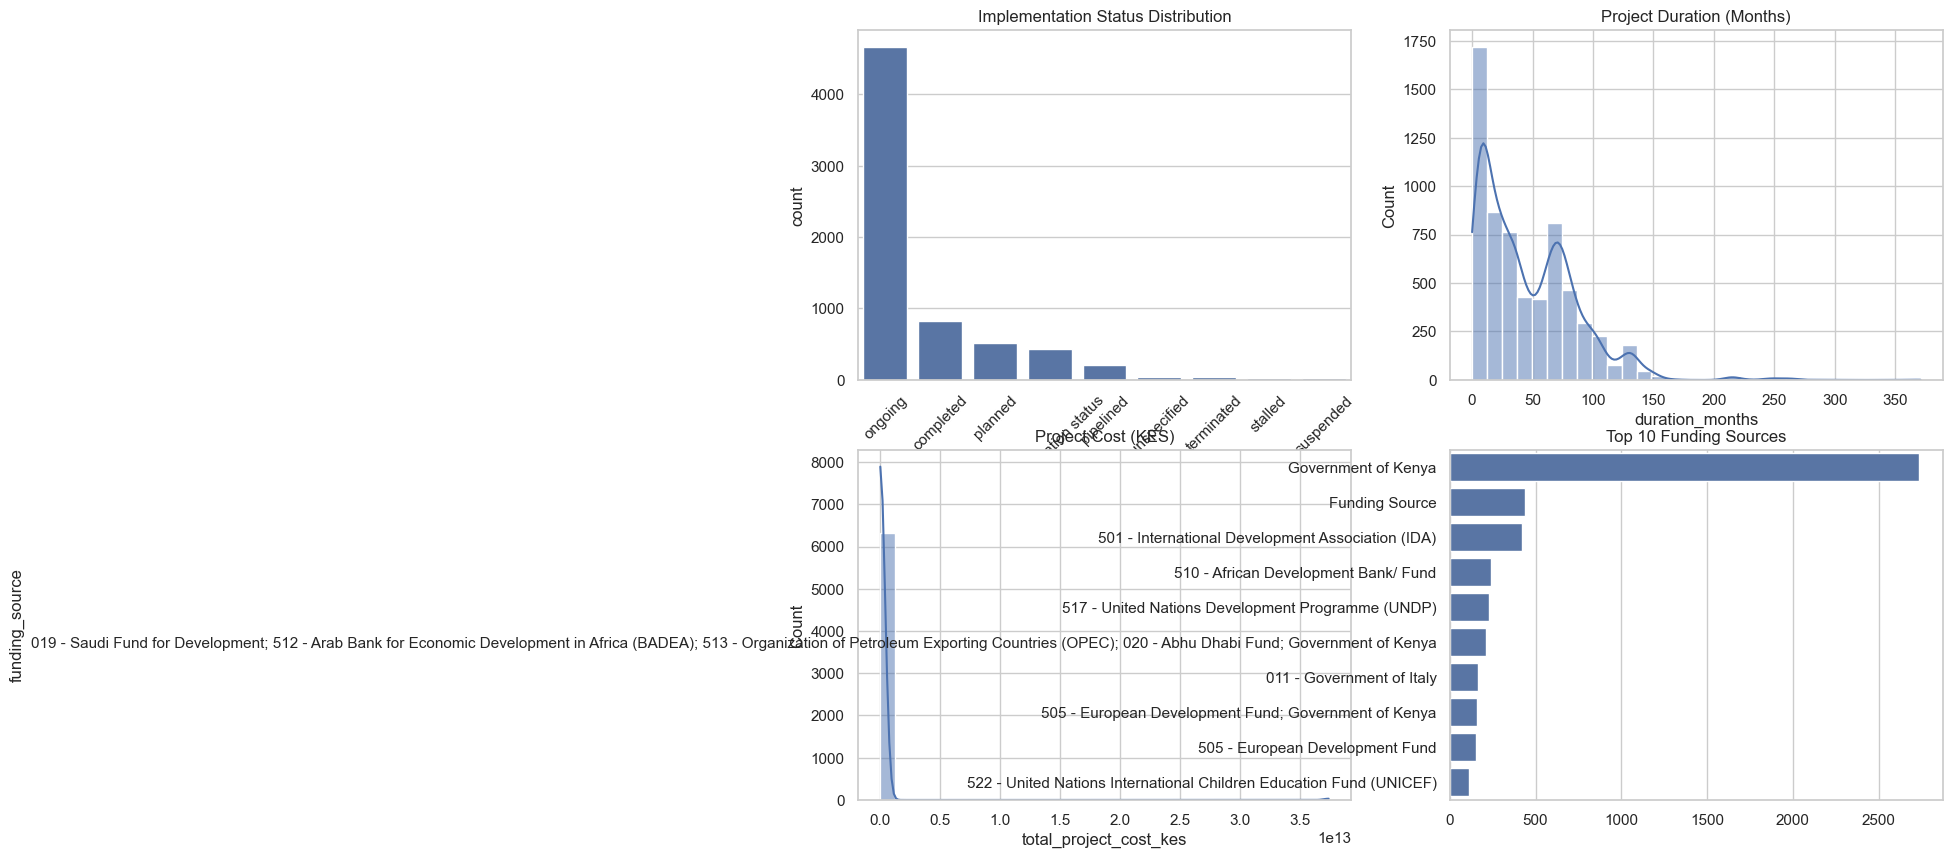

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "G:\My Drive\MSc. DSA\Module V\DSA 8502 Predictive & Optimisation Analytics\End of Module Project\donor-funded-projects-in-kenya-per-county-in-line-with-mdgs.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Fix headers and drop garbage rows
df.columns = df.iloc[1]  # Use second row as header
df = df.drop([0, 1]).reset_index(drop=True)

# Standardize column names
df.columns = [str(col).strip().lower().replace(" ", "_").replace("(", "").replace(")", "") for col in df.columns]

# Drop rows with critical missing values
df_cleaned = df.dropna(subset=['implementation_status']).copy()

# Convert 'duration_months' to numeric
df_cleaned.loc[:, 'duration_months'] = df_cleaned['duration_months'].str.extract(r'(\d+)').astype(float)

# Convert 'total_project_cost_kes' to numeric
df_cleaned.loc[:, 'total_project_cost_kes'] = df_cleaned['total_project_cost_kes'].str.replace(',', '')
df_cleaned.loc[:, 'total_project_cost_kes'] = pd.to_numeric(df_cleaned['total_project_cost_kes'], errors='coerce')

# Clean and standardize categorical text data (optional step)
df_cleaned.loc[:, 'implementation_status'] = df_cleaned['implementation_status'].str.strip().str.lower()
df_cleaned.loc[:, 'funding_source'] = df_cleaned['funding_source'].str.strip()
df_cleaned.loc[:, 'mtef_sector'] = df_cleaned['mtef_sector'].str.strip()

# Set visualization style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Implementation Status Distribution
sns.countplot(
    data=df_cleaned,
    x='implementation_status',
    order=df_cleaned['implementation_status'].value_counts().index,
    ax=axes[0, 0]
)
axes[0, 0].set_title('Implementation Status Distribution')
axes[0, 0].tick_params(axis='x', rotation=45)

# Project Duration Distribution
sns.histplot(df_cleaned['duration_months'].dropna(), bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Project Duration (Months)')

# Project Cost Distribution
sns.histplot(df_cleaned['total_project_cost_kes'].dropna(), bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Project Cost (KES)')

# Top 10 Funding Sources
top_sources = df_cleaned['funding_source'].value_counts().nlargest(10)
sns.barplot(x=top_sources.values, y=top_sources.index, ax=axes[1, 1])
axes[1, 1].set_title('Top 10 Funding Sources')

# Layout adjustment
plt.tight_layout()
plt.show()


In [5]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Create binary target: project_success
df_cleaned['project_success'] = np.where(df_cleaned['implementation_status'] == 'completed', 1, 0)

# Select features
features = [
    'total_project_cost_kes',
    'duration_months',
    'funding_source',
    'mtef_sector',
    'implementing_agency'
]

# Drop rows where important features are missing
df_model = df_cleaned[features + ['project_success']].dropna().copy()

# Encode categorical features using LabelEncoder (for simplicity)
label_encoders = {}
for col in ['funding_source', 'mtef_sector', 'implementing_agency']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le  # Save encoders for later use

# Ready for modeling
X = df_model.drop('project_success', axis=1)
y = df_model['project_success']

# Show preview
df_model.head()


,total_project_cost_kes,duration_months,funding_source,mtef_sector,implementing_agency,project_success
0,18300000.0,33.0,127,12,8,0
1,45024924.0,48.0,127,12,8,0
2,50000000.0,51.0,127,12,8,0
3,35000000.0,47.0,127,12,8,0
4,65600000.0,46.0,127,12,8,0


In [6]:
%pip install xgboost


Note: you may need to restart the kernel to use updated packages.



Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1117
           1       0.00      0.00      0.00       140

    accuracy                           0.89      1257
   macro avg       0.44      0.50      0.47      1257
weighted avg       0.79      0.89      0.84      1257



C:\Users\Joyce\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Joyce\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Joyce\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

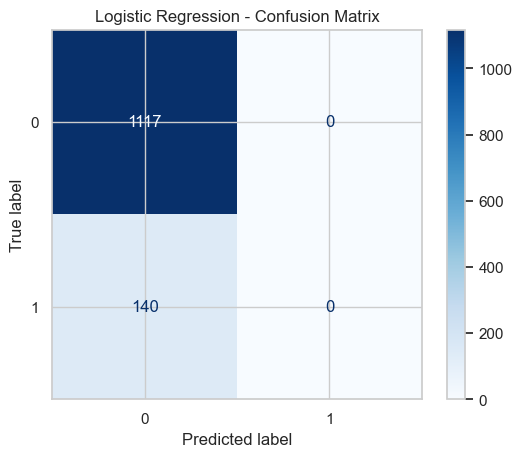


Model: Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1117
           1       0.64      0.72      0.68       140

    accuracy                           0.92      1257
   macro avg       0.80      0.84      0.82      1257
weighted avg       0.93      0.92      0.93      1257



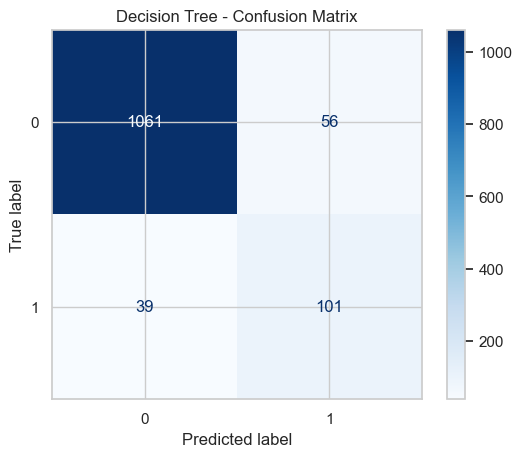


Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1117
           1       0.76      0.68      0.72       140

    accuracy                           0.94      1257
   macro avg       0.86      0.83      0.84      1257
weighted avg       0.94      0.94      0.94      1257



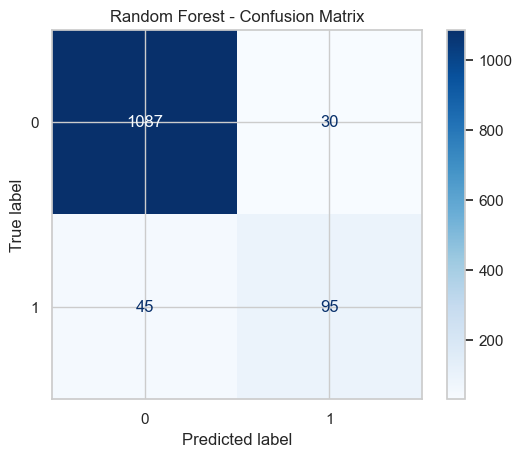


Model: XGBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1117
           1       0.72      0.71      0.72       140

    accuracy                           0.94      1257
   macro avg       0.84      0.84      0.84      1257
weighted avg       0.94      0.94      0.94      1257



C:\Users\Joyce\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [13:50:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


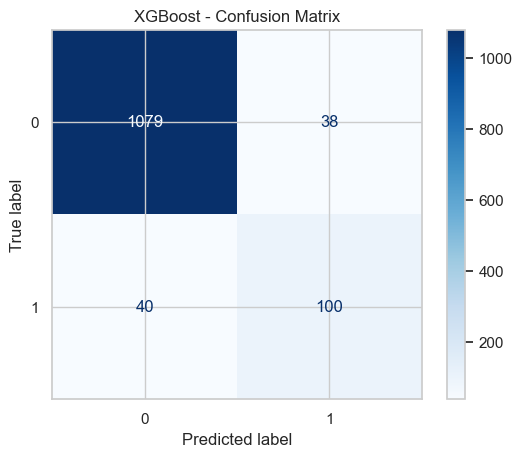

In [9]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Ensure numeric type for total_project_cost_kes
X['total_project_cost_kes'] = pd.to_numeric(X['total_project_cost_kes'], errors='coerce')

# Drop rows with NaN values in total_project_cost_kes after conversion
X = X.dropna(subset=['total_project_cost_kes'])

# Update y to match the filtered X
y = y.loc[X.index]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nModel: {name}")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Define Success/Failure Labels
success_status = ['completed']
failure_status = ['ongoing', 'terminated', 'stalled', 'suspended']

# Lowercase implementation_status for consistent matching
df_cleaned['implementation_status'] = df_cleaned['implementation_status'].str.strip().str.lower()

# Filter dataset
df_labeled = df_cleaned[df_cleaned['implementation_status'].isin(success_status + failure_status)].copy()
df_labeled['project_success'] = np.where(df_labeled['implementation_status'] == 'completed', 1, 0)

# Feature selection
features = [
    'total_project_cost_kes',
    'duration_months',
    'funding_source',
    'mtef_sector',
    'implementing_agency'
]

df_model = df_labeled[features + ['project_success']].dropna().copy()

# Encode categorical features
label_encoders = {}
for col in ['funding_source', 'mtef_sector', 'implementing_agency']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

# Ensure numeric and split
df_model[features] = df_model[features].apply(pd.to_numeric, errors='coerce')
df_model = df_model.dropna()

X = df_model.drop('project_success', axis=1)
y = df_model['project_success']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define and compare models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = []
model_predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    model_predictions[name] = y_pred
    
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# Pick and save the best model
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False).reset_index(drop=True)
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

# Save model and predictions
model_path = f"{best_model_name.replace(' ', '_').lower()}_model.pkl"
joblib.dump(best_model, model_path)

pred_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': model_predictions[best_model_name]
})
pred_path = f"{best_model_name.replace(' ', '_').lower()}_predictions.csv"
pred_df.to_csv(pred_path, index=False)

# Output paths and comparison
print("Saved model to:", model_path)
print("Saved predictions to:", pred_path)
results_df



C:\Users\Joyce\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Joyce\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [13:57:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Saved model to: random_forest_model.pkl
Saved predictions to: random_forest_predictions.csv


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.942290,0.882812,0.697531,0.779310
1,XGBoost,0.934175,0.829630,0.691358,0.754209
2,Decision Tree,0.926060,0.770270,0.703704,0.735484
3,Logistic Regression,0.853922,0.000000,0.000000,0.000000


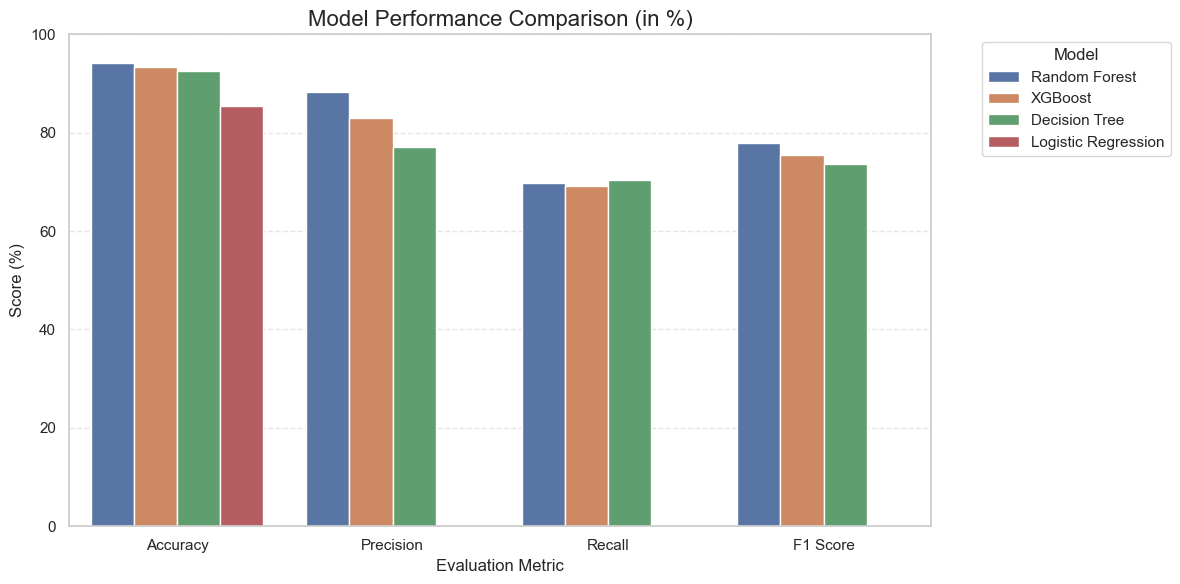

In [14]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your actual model results
results_df = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Decision Tree', 'Logistic Regression'],
    'Accuracy': [0.942290, 0.934175, 0.926060, 0.853922],
    'Precision': [0.882812, 0.829630, 0.770270, 0.000000],
    'Recall': [0.697531, 0.691358, 0.703704, 0.000000],
    'F1 Score': [0.779310, 0.754209, 0.735484, 0.000000]
})

# Convert to percentages
results_percent = results_df.copy()
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for metric in metrics:
    results_percent[metric] = (results_percent[metric] * 100).round(2)

# Reshape for seaborn barplot
results_melted = pd.melt(results_percent, id_vars='Model', value_vars=metrics,
                         var_name='Metric', value_name='Percentage')

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=results_melted, x='Metric', y='Percentage', hue='Model')
plt.title('Model Performance Comparison (in %)', fontsize=16)
plt.ylabel('Score (%)')
plt.xlabel('Evaluation Metric')
plt.ylim(0, 100)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [15]:
# Import needed libraries
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define X and y again (in case of kernel reset)
X = df_model.drop('project_success', axis=1)
y = df_model['project_success']

# Split the data (with stratify to balance classes)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Save model
joblib.dump(rf_model, "random_forest_model.pkl")

# Make and save predictions
y_pred = rf_model.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
pred_df.to_csv("random_forest_predictions.csv", index=False)

print("Model saved as: random_forest_model.pkl")
print("Predictions saved as: random_forest_predictions.csv")


Model saved as: random_forest_model.pkl
Predictions saved as: random_forest_predictions.csv


In [17]:
# Streamlit App
import streamlit as st
import pandas as pd
import joblib

# Load the saved Random Forest model
model = joblib.load("random_forest_model.pkl")

st.title("Project Success Predictor")

# User inputs
st.subheader("Enter Project Details:")
cost = st.number_input("Total Project Cost (KES)", min_value=0)
duration = st.number_input("Project Duration (Months)", min_value=0)
funding_source = st.selectbox("Funding Source", ["Government of Kenya", "World Bank", "UNICEF", "USAID", "Unknown"])
mtef_sector = st.selectbox("MTEF Sector", ["Education", "Health", "Infrastructure", "Governance", "Unknown"])
agency = st.selectbox("Implementing Agency", ["Ministry of Education", "Ministry of Health", "NGO", "County Government", "Unknown"])

# Encoding (replicate label encoders from training)
def encode_label(val, encoder):
    try:
        return encoder.transform([val])[0]
    except:
        return 0  # fallback to 'Unknown' or index 0
# Encode categorical features
label_encoders = {}
for col in ['funding_source', 'mtef_sector', 'implementing_agency']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le
    # Save each encoder
    joblib.dump(le, f"{col}_encoder.pkl")

# Reload encoders if you saved them
funding_encoder = joblib.load("funding_source_encoder.pkl")
sector_encoder = joblib.load("mtef_sector_encoder.pkl")
agency_encoder = joblib.load("implementing_agency_encoder.pkl")

# Encode inputs
encoded_input = pd.DataFrame([{
    'total_project_cost_kes': cost,
    'duration_months': duration,
    'funding_source': encode_label(funding_source, funding_encoder),
    'mtef_sector': encode_label(mtef_sector, sector_encoder),
    'implementing_agency': encode_label(agency, agency_encoder)
}])

# Predict button
if st.button("Predict Success"):
    prediction = model.predict(encoded_input)[0]
    label = "Successful" if prediction == 1 else "Not Successful"
    st.success(f"Prediction: {label}")


2025-04-11 14:15:36.004 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-11 14:15:36.006 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-11 14:15:36.006 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-11 14:15:36.008 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-11 14:15:36.008 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-11 14:15:36.010 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-11 14:15:36.010 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-11 14:15:36.011 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar